<a href="https://colab.research.google.com/github/specifinggamer/Machine-Learning/blob/main/copy_of_untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("Narzo extraplanets.csv")

In [ ]:
col = list(df.columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for m in col:
  df[m]=labelencoder.fit_transform(df[m])
df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,0,267,41,0,14,1524,1,555,1,2363,919,90,8
1,1,346,48,0,16,1441,1,563,1,2400,1026,42,8
2,2,219,57,0,15,882,1,605,1,2261,805,3,8
3,3,48,171,0,9,1173,1,584,1,2544,1060,119,8
4,4,58,127,0,3,561,1,637,1,2415,1034,155,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,5240,583,601,0,26,326,1,735,1,471,28,19,9
5246,5242,307,653,0,28,1020,1,599,1,2797,1243,3,1
5247,5243,3,919,3,24,322,0,461,0,68,19,29,8
5248,5244,3,919,2,24,448,0,539,0,128,30,3,8


In [ ]:
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,0,267,41,0,14,1524,1,555,1,2363,919,90,8
1,1,346,48,0,16,1441,1,563,1,2400,1026,42,8
2,2,219,57,0,15,882,1,605,1,2261,805,3,8
3,3,48,171,0,9,1173,1,584,1,2544,1060,119,8
4,4,58,127,0,3,561,1,637,1,2415,1034,155,8


In [ ]:
df.tail()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
5245,5240,583,601,0,26,326,1,735,1,471,28,19,9
5246,5242,307,653,0,28,1020,1,599,1,2797,1243,3,1
5247,5243,3,919,3,24,322,0,461,0,68,19,29,8
5248,5244,3,919,2,24,448,0,539,0,128,30,3,8
5249,5245,3,919,2,24,440,0,528,0,210,46,37,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   name               5250 non-null   int64
 1   distance           5250 non-null   int64
 2   stellar_magnitude  5250 non-null   int64
 3   planet_type        5250 non-null   int64
 4   discovery_year     5250 non-null   int64
 5   mass_multiplier    5250 non-null   int64
 6   mass_wrt           5250 non-null   int64
 7   radius_multiplier  5250 non-null   int64
 8   radius_wrt         5250 non-null   int64
 9   orbital_radius     5250 non-null   int64
 10  orbital_period     5250 non-null   int64
 11  eccentricity       5250 non-null   int64
 12  detection_method   5250 non-null   int64
dtypes: int64(13)
memory usage: 533.3 KB


In [ ]:
df.shape

(5250, 13)

In [ ]:
df.describe()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,2624.500000,1046.770286,1466.484381,1.070476,22.732571,856.944571,0.321333,500.579810,0.636952,1352.147429,316.259619,24.112952,8.532000
std,1515.688787,753.723254,857.989969,0.875561,4.305281,414.470867,0.476323,327.215254,0.487612,828.453990,375.402349,39.276060,1.291643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1312.250000,333.000000,692.250000,0.000000,21.000000,565.000000,0.000000,125.000000,0.000000,661.000000,45.000000,3.000000,9.000000
50%,2624.500000,970.000000,1493.500000,1.000000,23.000000,840.500000,0.000000,586.500000,1.000000,1208.500000,125.000000,3.000000,9.000000
75%,3936.750000,1668.750000,2211.750000,2.000000,25.000000,1169.000000,1.000000,753.750000,1.000000,2058.750000,466.750000,29.000000,9.000000
max,5249.000000,2542.000000,2875.000000,4.000000,30.000000,1721.000000,2.000000,1032.000000,2.000000,2827.000000,1277.000000,177.000000,10.000000


In [ ]:
df.nunique()

name                 5250
distance             2543
stellar_magnitude    2876
planet_type             5
discovery_year         31
mass_multiplier      1722
mass_wrt                3
radius_multiplier    1033
radius_wrt              3
orbital_radius       2828
orbital_period       1278
eccentricity          178
detection_method       11
dtype: int64

In [ ]:
df.isnull().sum()

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
mass_wrt             0
radius_multiplier    0
radius_wrt           0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
dtype: int64

In [ ]:
df.isnull()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,False,False,False,False,False,False,False,False,False,False,False,False,False
5246,False,False,False,False,False,False,False,False,False,False,False,False,False
5247,False,False,False,False,False,False,False,False,False,False,False,False,False
5248,False,False,False,False,False,False,False,False,False,False,False,False,False


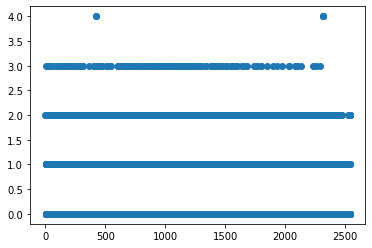

In [ ]:
plt.scatter(df.distance,df.planet_type)
plt.show()

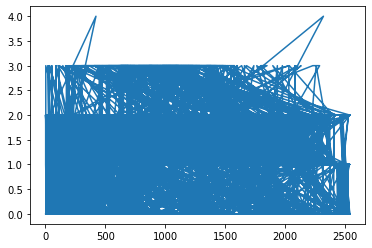

In [ ]:
plt.plot(df.distance,df.planet_type)
plt.show()

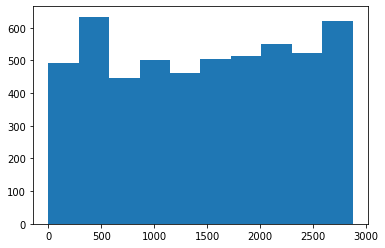

In [ ]:
plt.hist(df.stellar_magnitude)
plt.show()

In [ ]:
x=df.drop('detection_method',axis=1)
y=df['detection_method']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


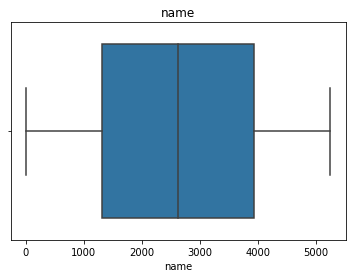

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


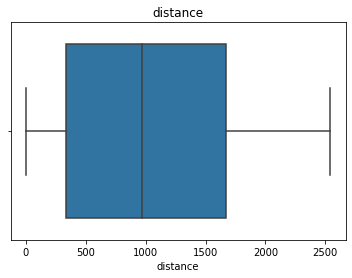

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


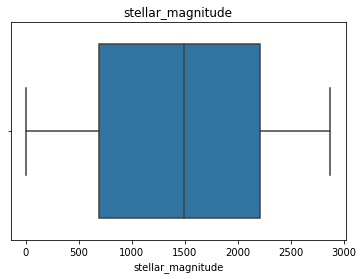

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


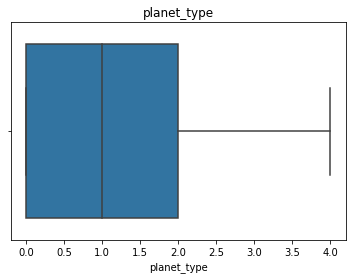

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


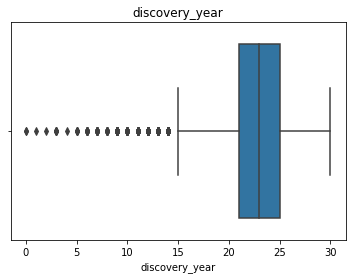

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


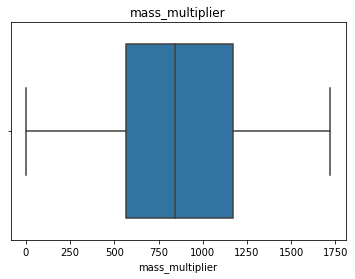

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


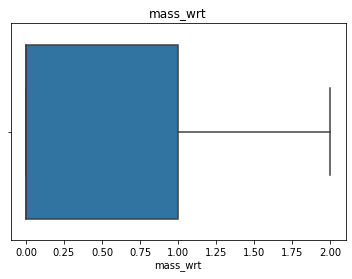

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


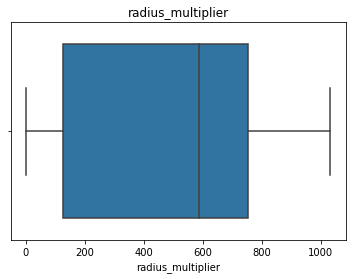

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


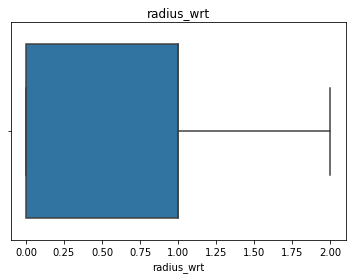

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


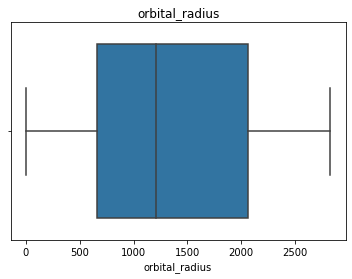

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


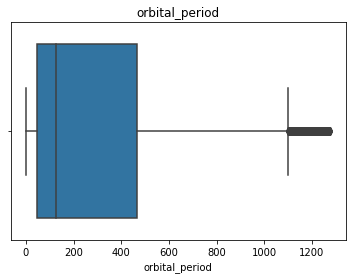

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


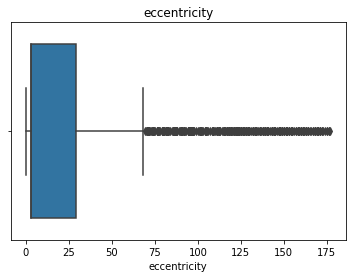

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


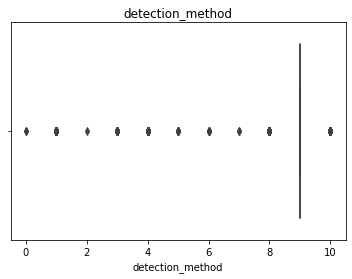

In [ ]:
for j in col:
  sns.boxplot(df[j])
  plt.title(j)
  plt.show()


In [ ]:
x.head(3)

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity
0,0,267,41,0,14,1524,1,555,1,2363,919,90
1,1,346,48,0,16,1441,1,563,1,2400,1026,42
2,2,219,57,0,15,882,1,605,1,2261,805,3


In [ ]:
y.head(3)


0    8
1    8
2    8
Name: detection_method, dtype: int64